In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = pd.read_csv('Dataset/cards.csv')
path_df = pd.DataFrame(path)

path_df.head()

class index                   filepaths        labels card type data set
0            0  train/ace of clubs/001.jpg  ace of clubs       ace    train
1            0  train/ace of clubs/002.jpg  ace of clubs       ace    train
2            0  train/ace of clubs/003.jpg  ace of clubs       ace    train
3            0  train/ace of clubs/004.jpg  ace of clubs       ace    train
4            0  train/ace of clubs/005.jpg  ace of clubs       ace    train

In [3]:
# For column names that contain space, replace the space with an underscore
path_df.columns = [c.replace(' ', '_') for c in path_df.columns]
path_df.head()

class_index                   filepaths        labels card_type data_set
0            0  train/ace of clubs/001.jpg  ace of clubs       ace    train
1            0  train/ace of clubs/002.jpg  ace of clubs       ace    train
2            0  train/ace of clubs/003.jpg  ace of clubs       ace    train
3            0  train/ace of clubs/004.jpg  ace of clubs       ace    train
4            0  train/ace of clubs/005.jpg  ace of clubs       ace    train

In [4]:
path_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  8155 non-null   int64 
 1   filepaths    8155 non-null   object
 2   labels       8155 non-null   object
 3   card_type    8155 non-null   object
 4   data_set     8155 non-null   object
dtypes: int64(1), object(4)
memory usage: 318.7+ KB


In [5]:
path_df.describe()

class_index
count  8155.000000
mean     25.765788
std      15.315650
min       0.000000
25%      12.000000
50%      26.000000
75%      39.000000
max      52.000000

In [6]:
grouped_card_type = path_df['card_type']
grouped_card_type.value_counts()

jack     711
queen    665
ace      642
eight    624
five     622
ten      619
six      616
two      613
four     605
nine     580
seven    580
king     579
three    574
xxx      125
Name: card_type, dtype: int64

In [7]:
grouped_labels = path_df['labels']
grouped_labels.value_counts()

ace of spades        191
jack of spades       182
ace of hearts        181
jack of clubs        181
jack of hearts       178
seven of spades      175
queen of diamonds    173
queen of spades      172
queen of clubs       171
jack of diamonds     170
eight of diamonds    169
ten of spades        168
six of spades        168
five of spades       168
four of clubs        167
two of spades        165
two of hearts        165
four of hearts       164
nine of spades       164
three of diamonds    163
eight of hearts      162
six of clubs         162
ten of diamonds      161
king of spades       161
five of clubs        160
seven of hearts      153
three of spades      152
ten of clubs         151
four of spades       150
queen of hearts      149
six of diamonds      149
five of diamonds     148
eight of clubs       148
five of hearts       146
king of diamonds     145
eight of spades      145
nine of hearts       143
two of diamonds      143
two of clubs         140
ten of hearts        139


In [8]:
# Extract card value and suit from labels

# unique_grouped_labels = grouped_labels.unique()

suits = []
values = []

for label in grouped_labels:
    if label.lower() != 'joker':
        value, suit = label.split('of ')  # Extract the value and suit
        suits.append(suit)
        values.append(value)

suits_unique = set(suits)
values_unique = set(values)

# EDA - Histogram of card values for each suit
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
flatten_axs = axs.flatten()

for idx, suit in enumerate(suits_unique):
    ax = flatten_axs[idx]
    suit_values = [values[i] for i in range(len(suits)) if suits[i] == suit]

    
    # Count occurrences of each value
    value_counts = {'ace ': 0, 'two ': 0, 'three ': 0, 'four ': 0, 'five ': 0, 'six ': 0, 'seven ': 0, 'eight ': 0,
                   'nine ': 0, 'ten ': 0, 'jack ': 0, 'queen ': 0, 'king ': 0}
    
    for value in suit_values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
            
    # Bar plot of value distribution
    ax.bar(value_counts.keys(), value_counts.values())
    ax.set_xlabel('Card Value')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'{suit} Card Values')

    # Add numbers to each bar
    for i, count in enumerate(value_counts.values()):
        ax.text(i, count, str(count), ha='center', va='bottom')
    
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts, rotation='vertical')


plt.tight_layout()
plt.show()
    

In [9]:
# histogram of suit
class_counts = {'hearts': 0, 'diamonds': 0, 'clubs': 0, 'spades': 0}
for suit in suits:
    if suit in class_counts:
        class_counts[suit] += 1
    else:
        class_counts[suit] = 1

# Bar plot of class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Suit')
plt.ylabel('Number of Samples')
plt.title('Suit Distribution')

# Add numbers to each bar
for i, count in enumerate(class_counts.values()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# check: count number each suit
heart = 0
spade = 0
club = 0
diamond = 0
joker = 0
for file in path_df['filepaths']:
    if 'hearts' in file:
        heart += 1
    elif 'spades' in file:
        spade += 1
    elif 'clubs' in file:
        club += 1
    elif 'diamonds' in file:
        diamond += 1
    elif 'joker' in file:
        joker += 1
        

print(f'heart:   {heart}')
print(f'diamond: {diamond}')
print(f'club:    {club}')
print(f'spade:   {spade}')
print(f'joker:   {joker}')


heart:   1975
diamond: 1957
club:    1937
spade:   2161
joker:   125


In [10]:
# functino to count number each suit in train, test, and validation

def display_counts(path):
    heart = 0
    spade = 0
    club = 0
    diamond = 0
    joker = 0
    for file in path_df['filepaths']:
        if 'hearts' in file and path in file:
            heart += 1
        elif 'spades' in file and path in file:
            spade += 1
        elif 'clubs' in file and path in file:
            club += 1
        elif 'diamonds' in file and path in file:
            diamond += 1
        elif 'joker' in file and path in file:
            joker += 1

    print(f'heart {heart}')
    print(f'spade {spade}')
    print(f'club {club}')
    print(f'diamond {diamond}')
    print(f'joker {joker}')

In [11]:
# count number each suit in train, test, and validation 
print('Training Dataset Counts')
train_counts = display_counts('train')
print('\n------------------ \n')

print('Testing Dataset Counts')
test_counts = display_counts('test')
print('\n------------------ \n')

print('Validation Dataset Counts')
validation_counts = display_counts('valid')
print('\n------------------ \n')



Training Dataset Counts
heart 1845
spade 2031
club 1807
diamond 1827
joker 115

------------------ 

Testing Dataset Counts
heart 65
spade 65
club 65
diamond 65
joker 5

------------------ 

Validation Dataset Counts
heart 65
spade 65
club 65
diamond 65
joker 5

------------------ 



In [20]:
one_of_each = []
joker = []
for img in path_df['filepaths']:
    if '001.jpg' in img and 'joker' not in img:
        one_of_each.append('Dataset/' + img)
    elif '001.jpg' in img and 'joker' in img:
        joker.append('Dataset/' + img)
print(len(one_of_each))
print(len(joker))

52
1


In [21]:
suits = np.array(one_of_each).reshape(13, 4)
row, col = suits.shape


<Figure size 640x480 with 0 Axes>

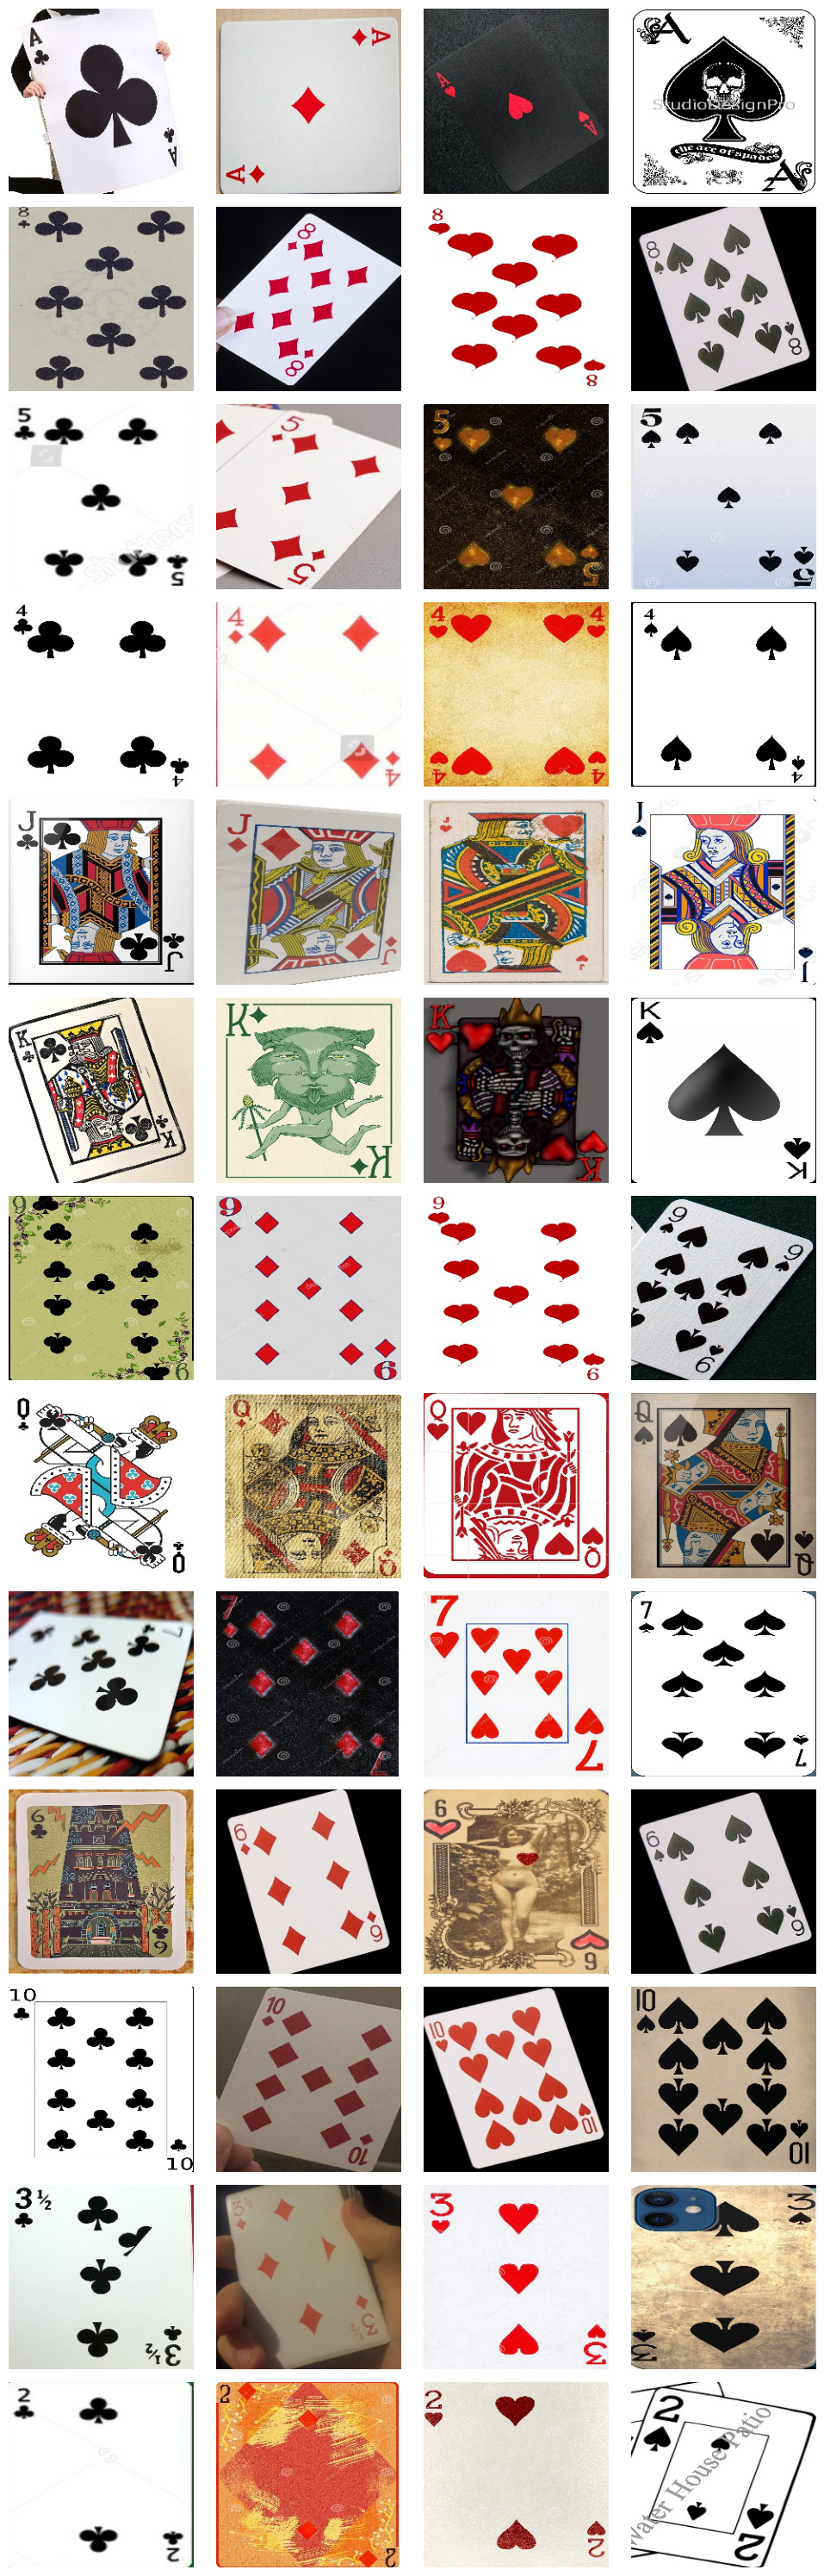

In [22]:
# Display all of the cards for each suit except Joker

plt.figure()
fig, ax = plt.subplots(13, 4, figsize = (10, 30))

for r in range(row):
    for c in range(col):
        img = plt.imread(suits[r][c])
        ax[r, c].imshow(img, cmap = 'gray')
        ax[r,c].axis('off')
        plt.subplots_adjust(left=0.1,
                            bottom=0.1,
                            right=1,
                            top= 1,
                            wspace=0.4,
                            hspace=0.4)

plt.tight_layout()        
plt.show()

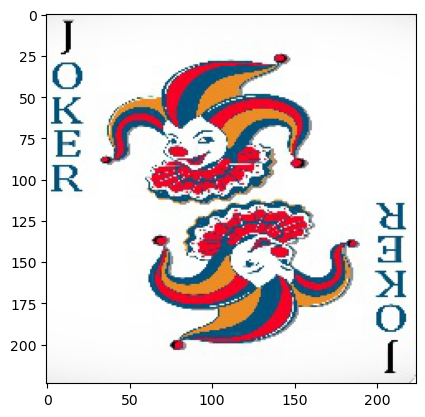

In [23]:
# display_joker

joker = plt.imread(joker[0])
plt.imshow(joker)


In [24]:
# Print out unique shapes of images

dataset_folder = "Dataset/train"

folders = os.listdir(dataset_folder)
images = []
image_shapes = []
for folder in folders:
  folder_path = os.path.join(dataset_folder, folder)
  for path in os.listdir(folder_path):
    image_path = os.path.join(os.path.join(dataset_folder, folder), path)
    image = cv2.imread(image_path)
    
    # Convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    images.append(image)
    
    # Obtain shape of each image and store them in an array
    (width, height) = image.shape[1], image.shape[0]
    image_shapes.append((width, height))
    
# Return only unique shapes
unique_shapes = list(set(image_shapes))
print(unique_shapes)

[(224, 224)]
